In [40]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix
import itertools


In [10]:
mnist=tf.keras.datasets.mnist

In [11]:
(x_train,y_train),(x_test,y_test)=mnist.load_data()

In [12]:
x_train=x_train/255.0
x_test=x_test/255.0
x_train.shape
# y_test[:10]

(60000, 28, 28)

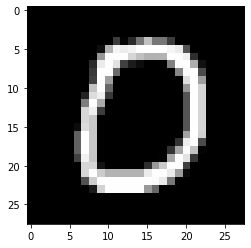

In [13]:
plt.imshow(x_test[10],cmap='gray')
# plt.savefig("new10.png")

In [14]:
##  ANN

model=tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(128,activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10,activation='softmax')
])

In [15]:
# #  CNN

# model = models.Sequential()
# model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28,28,1)))
# model.add(layers.MaxPooling2D((2, 2)))
# model.add(layers.Conv2D(64, (3, 3), activation='relu'))
# model.add(layers.MaxPooling2D((2, 2)))
# model.add(layers.Conv2D(64, (3, 3), activation='relu'))

In [16]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

r=model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=10)

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2996 - accuracy: 0.9122 - val_loss: 0.1452 - val_accuracy: 0.9587
Epoch 2/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.1459 - accuracy: 0.9574 - val_loss: 0.1000 - val_accuracy: 0.9694
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1095 - accuracy: 0.9666 - val_loss: 0.0867 - val_accuracy: 0.9747
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0892 - accuracy: 0.9722 - val_loss: 0.0809 - val_accuracy: 0.9756
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0745 - accuracy: 0.9762 - val_loss: 0.0757 - val_accuracy: 0.9766
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0659 - accuracy: 0.9791 - val_loss: 0.0681 - val_accuracy: 0.9792
Epoch 7/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0587 - accuracy: 0.9817 - val_loss: 0.0709 - val_accuracy:

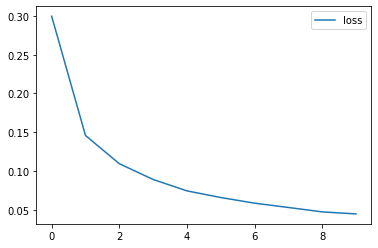

In [17]:
plt.plot(r.history['loss'],label='loss')
# plt.plot(r.history['val_loss'],label='val_loss')
plt.legend()

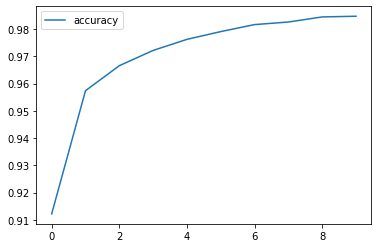

In [18]:
plt.plot(r.history['accuracy'],label='accuracy')
# plt.plot(r.history['val_accuracy'],label='val_accuracy')
plt.legend()

In [19]:
eval=model.evaluate(x_test,y_test)
print("Accuracy : ", eval[1])

313/313 [==============================] - 1s 3ms/step - loss: 0.0703 - accuracy: 0.9793
Accuracy :  0.9793000221252441


In [20]:
from sklearn.metrics import confusion_matrix
p_test=model.predict(x_test).argmax(axis=1)
cm=confusion_matrix(y_test,p_test)
print(cm)

313/313 [==============================] - 1s 2ms/step
[[ 968    1    0    1    1    1    3    3    2    0]
 [   0 1128    3    1    0    0    1    0    2    0]
 [   3    0 1013    3    2    0    1    6    4    0]
 [   0    0    6  988    0    3    0    5    4    4]
 [   0    0    5    0  958    0    4    4    3    8]
 [   2    0    0   12    1  860    4    1    8    4]
 [   4    3    0    1    3    2  941    0    4    0]
 [   0    6    7    2    0    0    0 1007    3    3]
 [   2    1    2    4    6    1    1    4  952    1]
 [   1    4    0    6    6    1    0    9    4  978]]


In [21]:
np.save('my_history.npy',r.history)

In [22]:
# def plot_confusion_matrix(cm,classes,normalize=False,title='Confusion matrix',cmap=plt.cm.Blues):
#   if normalize:
#     cm=cm.astype('float')/cm.sum(axis=1)[:,np.newaxis]
  

#   plt.imshow(cm,interpolation='nearest',cmap=cmap)
#   plt.title(title)
#   plt.colorbar()
#   tick_marks=np.arange(len(classes))
#   plt.xticks(tick_marks,classes,rotation=45)
#   plt.yticks(tick_marks,classes)

#   fmt='.2f' if normalize else 'd'
#   thresh=cm.max()/.2
#   for i,j in itertools.product(range(cm.shape[0]),range(cm.shape[1])):
#     plt.text(j,i,format(cm[i,j],fmt),
#              ha="center",
#              color='white' if cm[i,j]> thresh else 'black')

#   plt.tight_layout()
#   plt.ylabel('True label')
#   plt.xlabel('predicted label')
#   plt.show

# p_test=model.predict(x_test).argmax(axis=1)
# cm=confusion_matrix(y_test,p_test)
# # print(cm)
# plot_confusion_matrix(cm,list(range(10)))

Text(0.5, 1.0, 'True label: 1 Predicted: 8 ')

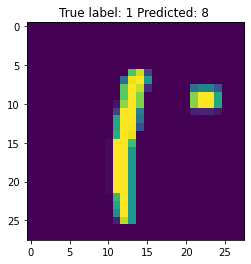

In [23]:
misclassified_idx=np.where(p_test!=y_test)[0]
# misclassified_idx[:10]
i=np.random.choice(misclassified_idx)
plt.imshow(x_test[i])
plt.title('True label: %s Predicted: %s '%(y_test[i],p_test[i]))

In [39]:
y = model.predict(x_train[1]).argmax(axis=1)

1/1 [==============================] - 0s 19ms/step


0

In [24]:
model.save('model.h5')

In [25]:
# np.save()